https://www.coursera.org/learn/applied-calculus-with-python

# Imports
----

In [ ]:
# from sympy import *
from sympy.plotting import *
from sympy import Symbol
from sympy import *
from sympy.parsing.sympy_parser import parse_expr

from matplotlib import pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import math

# Plot functions
---

In [ ]:
def plot_f(f, x, low_limit=None, high_limit=None, size=None):
  if low_limit and high_limit:
    plot(f, (x, low_limit, high_limit), size=size)
  else:
    plot(f, x, size=size)
  plt.show()

In [ ]:
def plot_fs(fs, x, low_limit=None, high_limit=None, size=None):
  if len(fs) == 0:
    print('no functions to plot')
  elif len(fs) == 1:
    plot_f(fs[0], x, low_limit, high_limit, size)
  else:
    plots = None
    for i, f in enumerate(fs):
      label = f'f{i}'
      if low_limit and high_limit:
        p = plot(f, (x, low_limit, high_limit), size=size, show=False, label=label, legend=True)
      else:
        p = plot(f, x, size=size, show=False, label=label, legend=True)

      if plots is None:
        plots = p
      else:
        plots.extend(p)

    plots.show()

# Tangent line
----

In [ ]:
def tangent_line(f, a):
  # tangent line of f(x) at x = a has equation: y = f(a) + f'(a)(x - a)

  # find the function value at a
  f_a = f.subs(x, a)

  # find the slope of the tangent line f'(a)
  df = diff(f, x)
  m = df.subs(x, a)

  # substitue point and slope in tangent line equation
  return f_a + m*(x-a)

In [ ]:
x = symbols('x')
f = 4*x**4 - x**3 - 6*x**2 + x + 1
tangent_line(f, 1)

2*x - 3

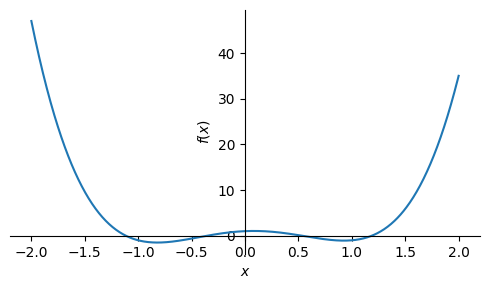

In [ ]:
plot_f(f, x, -2, 2, (5,3))

# Local Extrema Calculator
---

In [ ]:
def check_inc_dec(f, points):
  test_points = []
  offset = 0.5
  if len(points) > 1:
    differences = [points[i+1] - points[i] for i in range(len(points)-1)]
    min_diff = min(differences)
    if min_diff <= offset:
      offset = min_diff / 2

  for i, cp in enumerate(points):
    test_points.append([cp - offset, cp + offset])

  signs = []
  for test_point in test_points:
    f_a = f.subs({x:test_point[0]}).evalf()
    f_b = f.subs({x:test_point[1]}).evalf()

    if f_a > 0:
      sign_a = 'positive'
    elif f_a < 0:
      sign_a = 'negative'
    else:
      sign_a = 'not changing'

    if f_b > 0:
      sign_b = 'positive'
    elif f_b < 0:
      sign_b = 'negative'
    else:
      sign_b = 'not changing'

    signs.append([sign_a, sign_b])

  print(f'signs: {signs}')

In [ ]:
def local_extrema_calculator(f, x):
  min_list = []
  max_list = []

  # find f'
  df = Derivative(f, x).doit()

  # find critical points using the first derivative
  critical_points = solve(df, x)
  print(f'critical points: {critical_points}')

  # check increasing and decreasing first derivative around critical points
  check_inc_dec(df, critical_points)

  # check if max/min using second derivative test
  d2f = Derivative(f, x, 2).doit()

  # check concavity
  for cp in critical_points:
    d2y = d2f.subs({x:cp}).evalf()
    if d2y > 0:
      # concave up
      print(f'x = {cp} is a local minimum')
      y = f.subs({x: cp}).evalf(3)
      min_list.append(y)
    elif d2y < 0:
      # concave down
      print(f'x = {cp} is a local maximum')
      y = f.subs({x: cp}).evalf(3)
      max_list.append(y)
    else:
      print(f'unable to determine if {cp} is a min or max')

  print(f'max(es) {max_list}')
  print(f'min(s) {min_list}')

  # get inflection points
  inflection_points = solve(d2f, x)
  inflection_points = [ip.evalf(3) for ip in inflection_points]
  print(f'inflection points: {inflection_points}')

  # check increasing and decreasing second derivative around inflection points
  check_inc_dec(d2f, inflection_points)

## Example

In [ ]:
x = symbols('x')
f = 3*x**4 - 16*x**3 + 18*x**2
local_extrema_calculator(f, x)

critical points: [0, 1, 3]
signs: [['negative', 'positive'], ['positive', 'negative'], ['negative', 'positive']]
x = 0 is a local minimum
x = 1 is a local maximum
x = 3 is a local minimum
max(es) [5.00]
min(s) [0, -27.0]
inflection points: [0.451, 2.22]
signs: [['positive', 'negative'], ['negative', 'positive']]


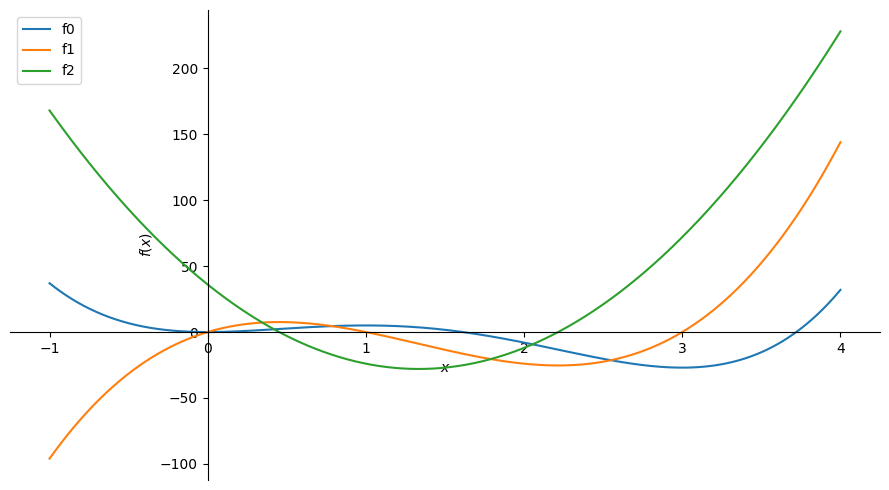

In [ ]:
x = symbols('x')

f = 3*x**4 - 16*x**3 + 18*x**2
df = Derivative(f, x).doit()
d2f = Derivative(f, x, 2).doit()
fs = [f, df, d2f]
plot_fs(fs, x, -1, 4, (9, 5))

## Example

In [ ]:
x = symbols('x')
f = -16*x**2 + 48*x + 4
local_extrema_calculator(f, x)

critical points: [3/2]
x - 3/2 is a local maximum
max(es) [40.0]
min(s) []
inflection points: []


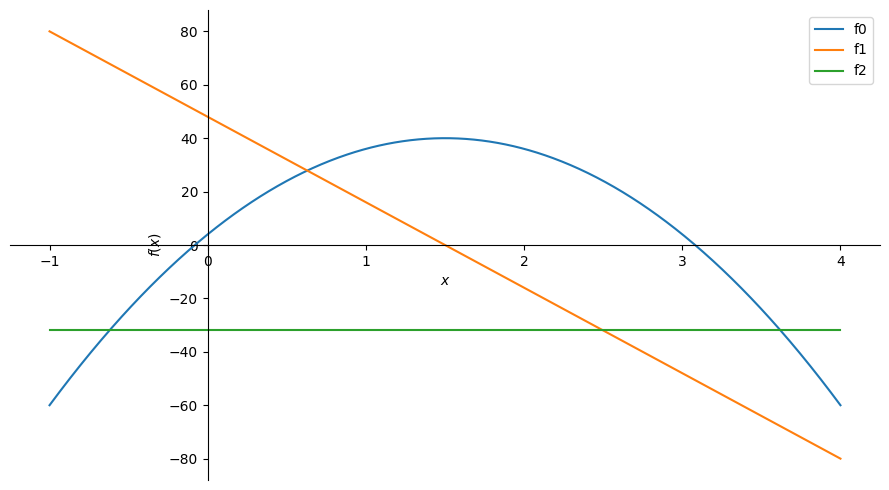

In [ ]:
x = symbols('x')

f = -16*x**2 + 48*x + 4
df = Derivative(f, x).doit()
d2f = Derivative(f, x, 2).doit()
fs = [f, df, d2f]
plot_fs(fs, x, -1, 4, (9, 5))

# Global min max calculator
---

In [ ]:
def global_min_max_calculator(f, x, interval):
  # find f'
  df = Derivative(f, x).doit()

  # find critical points using the first derivative
  critical_points = solve(df, x)
  critical_points = [cp for cp in critical_points if cp > interval[0] and cp < interval[1]]
  print(f'critical points: {critical_points}')

  # check increasing and decreasing first derivative around critical points
  check_inc_dec(df, critical_points)

  # compute f values
  x_values = interval + critical_points
  f_values = [f.subs(x, i) for i in x_values]

  # find the min and max
  g_min = min(f_values)
  g_max = max(f_values)

  # find the x locations
  min_index = f_values.index(g_min)
  x_min = x_values[min_index]
  max_index = f_values.index(g_max)
  x_max = x_values[max_index]

  print(f'global min: {g_min} at x = {x_min}')
  print(f'global max: {g_max} at x = {x_max}')

  # check if max/min using second derivative test
  d2f = Derivative(f, x, 2).doit()

  # get inflection points
  inflection_points = solve(d2f, x)
  inflection_points = [ip.evalf(3) for ip in inflection_points]
  print(f'inflection points: {inflection_points}')

  # check increasing and decreasing second derivative around inflection points
  check_inc_dec(d2f, inflection_points)

## Example

In [ ]:
x = symbols('x')
f = 3*x**4 - 16*x**3 + 18*x**2
global_min_max_calculator(f, x, [0, 4])

critical points: [1, 3]
signs: [['positive', 'negative'], ['negative', 'positive']]
global min: -27 at x = 3
global max: 32 at x = 4
inflection points: [0.451, 2.22]
signs: [['positive', 'negative'], ['negative', 'positive']]


# Riemann sum calculator
---

In [ ]:
def riemann_sum_calculator(f, x, a, b, n, side):
  width = (b-a)/n
  areas = []

  # calculate the individual areas
  for i in range(n):
    if side.lower() == 'left':
      x_val = a + width*i
    else:
      x_val = a + width*(i+1)
    height = (f.subs({x:x_val}).evalf())
    areas.append(width*height)

  # sum the area
  area = sum(areas)
  print(f'net area: {area}')

  # compute the actual integral
  intgl = Integral(f, (x, a, b)).doit().evalf()
  print(f'the actual integral is {intgl}')

In [ ]:
x = symbols('x')
f = x**2
a = 0
b = 1
n = 500
side = 'left'

riemann_sum_calculator(f, x, a, b, n, side)

net area: 0.332334000000000
the actual integral is 0.333333333333333


# Module 1
---

In [ ]:
from sympy import *

In [ ]:
x = Symbol('x')

In [ ]:
x+x

2*x

In [ ]:
x, y, z = symbols('x, y, z')

In [ ]:
g = (x+y)**2

In [ ]:
g.expand()

x**2 + 2*x*y + y**2

In [ ]:
(x**2 - y**2).factor()

(x - y)*(x + y)

In [ ]:
f = x**2 + 2*x + 1

In [ ]:
f.subs(x, 2)

9

In [ ]:
g = f / (x)

In [ ]:
print(g)

(x**2 + 2*x + 1)/x


In [ ]:
print(g.simplify())

x + 2 + 1/x


# Module 2
---

- Function: a rule that assigns to each element x in set a set A exactly one element, called f(x), in a set B    
- Example: f(x) = x + 1, f(x) = x**2    
- Input is called the independant variable or argument
- Output is called the dependant variable
- Set A is the domain.   
- Set B is the range.   
- (x) -- f --> (y)   
   A _________ B     
- Vertical line test  
  - Given a graph, how do you tell if it's the graph of the function
  - Draw a bunch of vertical lines
  - if a vertical line crosses the graph twice it fails and it's not the graph of a function
- Piecewise functions
- f(x) is even if f(x) = f(-x) - exp: y = x**2, y = abs(x), cos(x)   
- f(x) is odd if f(x) = -f(x) - exp: y = **3, sin(x)
- Function composition
  - f o g - 'f composed with g'
  - (f o g) = f(g(x))
  - not communicative
  




In [ ]:
# Set the function name and three parameters separated by commas
def pythagoras(a, b, c):
    # Instruct the function to test equality
    return a**2 + b**2 == c**2

# The function returns True when the numbers can be side lengths of a right triangle
pythagoras(3, 4, 5)

True

In [ ]:
from sympy.plotting import *
from sympy import Symbol
from matplotlib import pyplot as plt

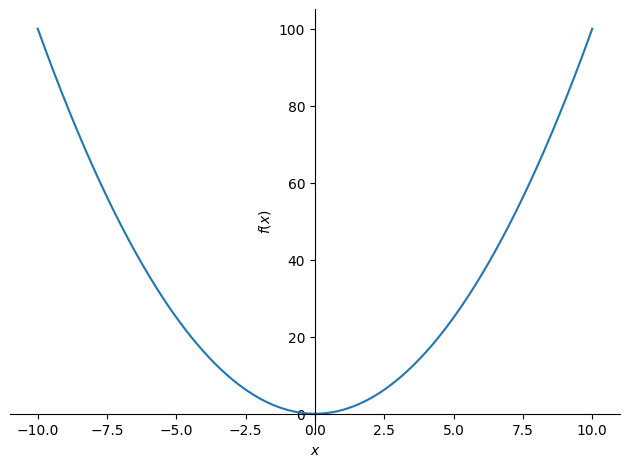

In [ ]:
x = Symbol('x')
plot(x**2)
plt.show()

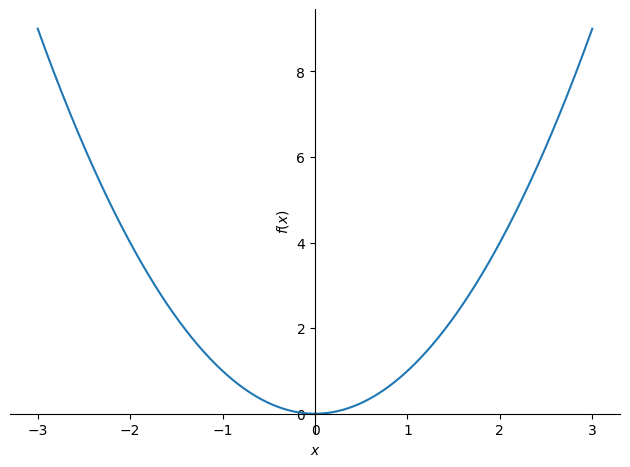

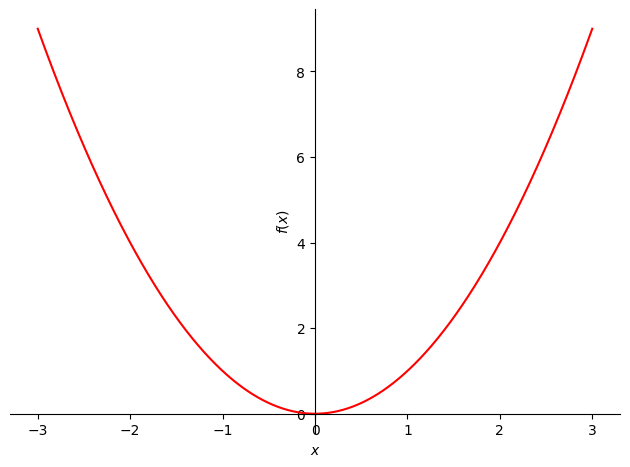

In [ ]:
plot1 = plot(x**2, (x, -3, 3))
plot1[0].line_color = 'r'
plot1.show()

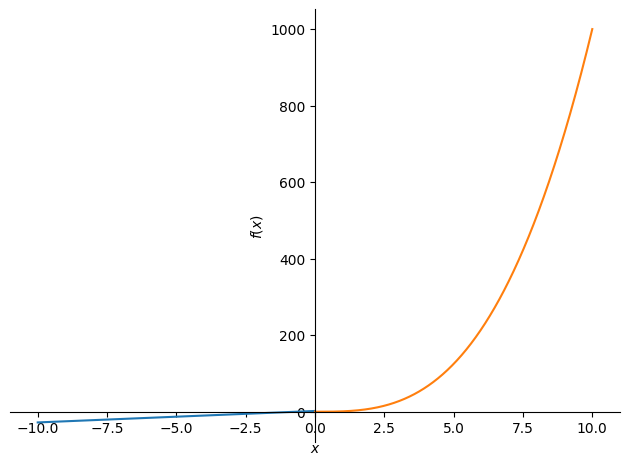

In [ ]:
f1 = 3*x + 2
f2 = x**3
plot((f1, (x, -10, 0)), (f2, (x, 0, 10)))

In [ ]:
import numpy as np
from sympy.plotting import *
from sympy import Symbol

In [ ]:
def zeros(a, b, c):
  D = np.sqrt(b*b-4*a*c)
  x1 = (-b + D)/(2*a)
  x2 = (-b - D)/(2*a)
  print(f'first root is: {x1}')
  print(f'second root is: {x2}')

In [ ]:
def print_graph(a, b, c):
  x=Symbol('x')
  plot(a*x**2 + b*x + c)

Enter a1
Enter b2
Enter c1
first root is: -1.0
second root is: -1.0


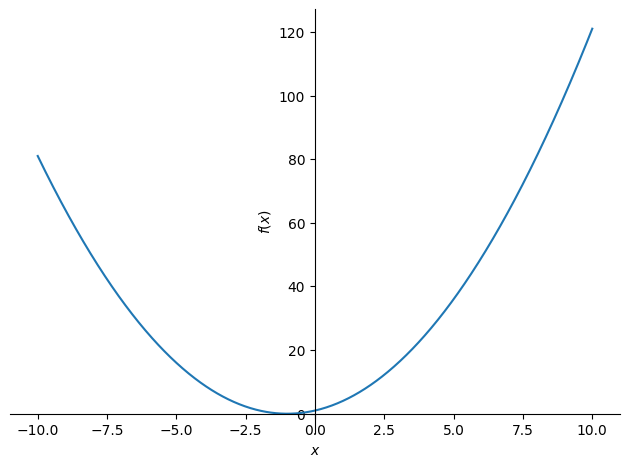

In [ ]:
a = input('Enter a')
b = input('Enter b')
c = input('Enter c')
zeros(float(a), float(b), float(c))
print_graph(float(a), float(b), float(c))

In [ ]:
def linear(a,b,c,d):
  # (a, b), (c, d)
  # y(a) = b, y(c) = d
  # y = mx + z
  # b = a*m + z
  # d = c*m + z
  x = symbols('x')
  slope = (d-b)/(c-a)
  intercept = b - a*slope
  return slope*(x) + intercept

linear(4, 9, 1.5, 7)

0.8*x + 5.8

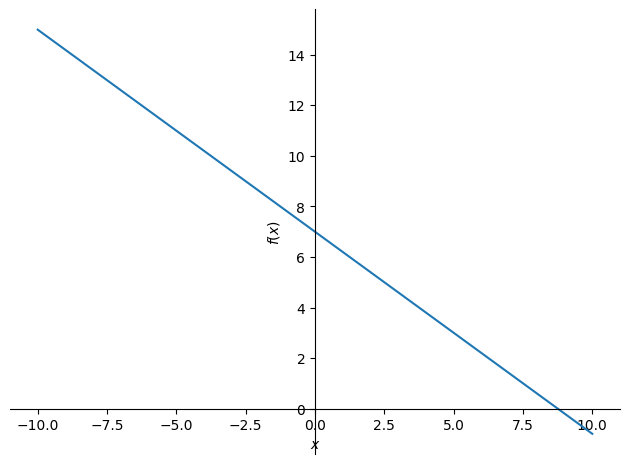

In [ ]:
x = Symbol('x')
plot((-4*x)/5 + 7)
plt.show()

# Logarithms
---

logₐx = y <--> aʸ = x

- log rules
  - logₐ(xy) = logₐx + logₐy
  - logₐ(x/y) = logₐx - logₐy
  - logₐ(xⁿ) = n * logₐ(x)
  - logₐ(1) = 0
  - logₐ(a) = 1
  - logₐ(0) = undefined

  

e = 2.718...   
log<sub>e</sub>(x) = ln(x)   
ln(x) = y <---> e<sup>y</sup> = x   
ln(e<sup>y</sup>) = x   
e<sup>ln(x)</sup> = x    
ln(e) = 1  
ln(1) = 1    
ln(0) = undefined   
e<sup>0</sup> = 1

In [ ]:
x = symbols('x')
Eq(5*x + 3, 1)

Eq(5*x + 3, 1)

In [ ]:
x = symbols('x')
solveset(Eq(5*x + 3, 1), x)

{-2/5}

In [ ]:
x = symbols('x')
solveset(Eq(2**x, 8), x, domain = S.Reals)

{3}

In [ ]:
import math

In [ ]:
math.exp(1)

2.718281828459045

In [ ]:
# natural log
math.log(3)

1.0986122886681098

In [ ]:
# to change base
math.log(10, 5)

1.4306765580733933

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

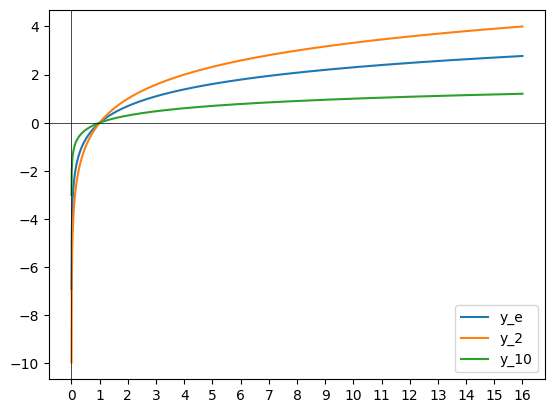

In [ ]:
def create_graph():
  x = np.linspace(0.001, 16, 2000)
  y_e = np.log(x)
  y_2 = np.log2(x)
  y_10 = np.log10(x)

  plt.plot(x, y_e, label='y_e')
  plt.plot(x, y_2, label='y_2')
  plt.plot(x, y_10, label='y_10')

  plt.xticks(range(math.floor(min(x)), math.ceil(max(x)+1)))
  plt.axhline(0, color='k', linewidth='0.5')
  plt.axvline(0, color='k', linewidth='0.5')

  plt.legend()
  plt.show()

create_graph()

In [ ]:
def digit_counter(n):
  n_digits = int(math.log10(n) + 1)
  print(f'Number of digits: {n_digits}')

digit_counter(12345)

Number of digits: 5


In [ ]:
np.log(1/np.e**3)

np.float64(-3.0)

In [ ]:
362000 * np.e**0.1

400071.8723433845

In [ ]:
np.log(450000/362000) / 0.01

np.float64(21.76033709385944)

In [ ]:
np.log(np.e**(2/5))/2

np.float64(0.2)

In [ ]:
135120*(np.e**(0.325*20))

89873937.45695414

In [ ]:
np.log(1400/720)/0.03

np.float64(22.165876786441633)

In [ ]:
t = symbols('t')
pop = 135120*exp(0.325*t)
pop.subs(t, 20)

89873937.4569542

# Module 3
---

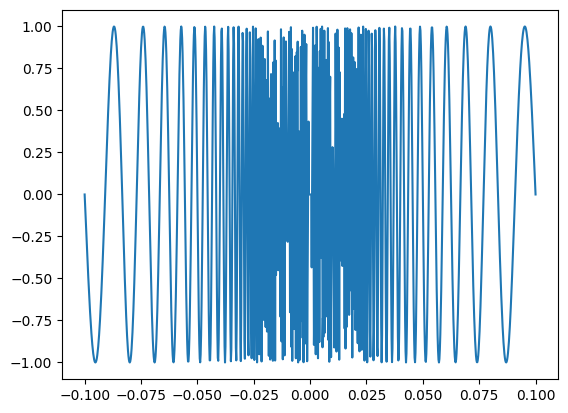

In [ ]:
x = np.linspace(-.1, .1, 1000)
y = np.sin(np.pi / x)
plt.plot(x, y)
plt.show()

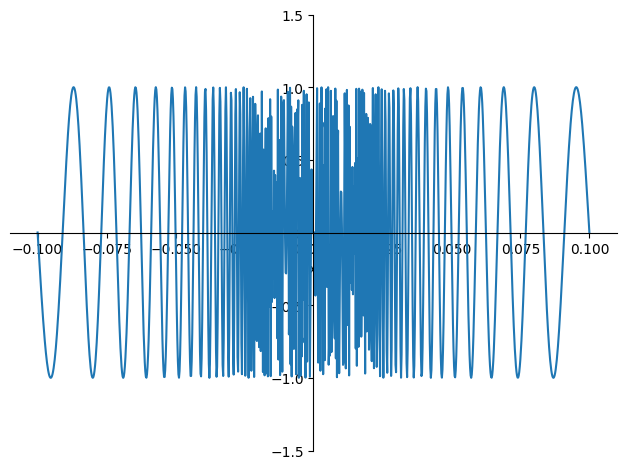

In [ ]:

x = symbols('x')
expr = sin(pi/x)
p = plot(expr, (x, -0.1, 0.1), ylim=(-1.5, 1.5))

In [ ]:
x = symbols('x')
# define the function f
f = (x**2 - x - 2)/(x - 2)
# make a list of values approaching 2 from the left and right
x_values = [1.9, 1.99, 1.999, 2.001, 2.01, 2.1]
# use list comprehension to make a list of function values
f_values = [f.subs(x, i) for i in x_values]
print(f_values)

[2.90000000000000, 2.98999999999998, 2.99899999999986, 3.00100000000014, 3.00999999999998, 3.10000000000000]


In [ ]:
x = symbols('x')
limit((x**2 - x - 2)/(x - 2), x, 2)

3

In [ ]:
x = symbols('x')
limit(exp(x), x, oo)

oo

In [ ]:
x, h = symbols('x, h')
# Write symbolic expression for the function
f_x = exp(x**2)
# Substitute for f(1 + h)
f_1h = f_x.subs(x, 1 + h)
# Substitute for f(1)
f_1 = f_x.subs(x, 1)
# Limit for instantaneous rate of change at 1
iroc1 = limit((f_1h -f_1)/h, h, 0)
print(iroc1)
iroc1.evalf()

2*E


5.43656365691809

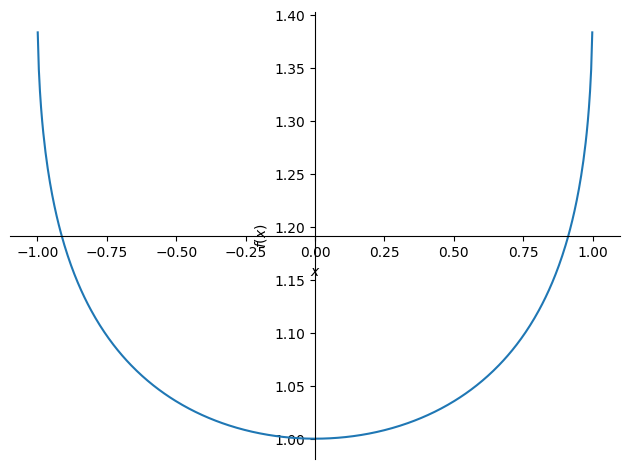

In [ ]:
x = Symbol('x')
f = ((1+x)**0.5 - (1-x)**0.5) / x
plot(f, (x, -2, 2))

In [ ]:
xvals = [-.1, -.01, -.001, -.0001, .0001, .001, .01, .1]
yvals =[f.subs(x,i) for i in xvals]
yvals

[1.00125550119638,
 1.00001250054690,
 1.00000012500001,
 1.00000000124889,
 1.00000000124889,
 1.00000012500001,
 1.00001250054690,
 1.00125550119638]

In [ ]:
L = limit(f,x,0)
L

1

In [ ]:
L_left = limit(f,x,0,'-')
L_left

1

In [ ]:
L_right = limit(f,x,0,'+')
L_right

1

In [ ]:
limit(1/x, x, S.Infinity)

0

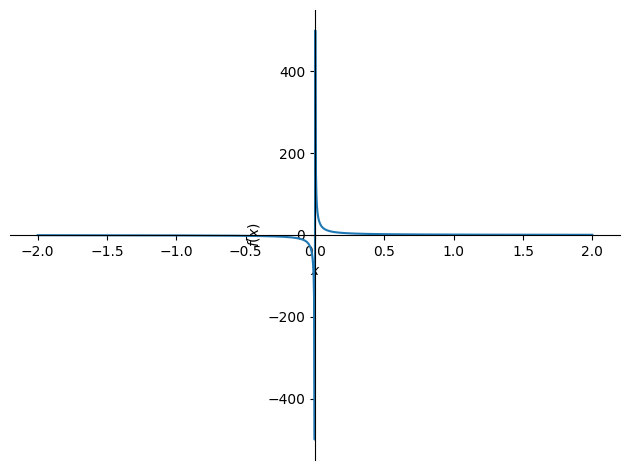

In [ ]:
x = Symbol('x')
f = 1/x
plot(f, (x, -2, 2))

In [ ]:
limit(1/x, x, S.Infinity, '+')

0

In [ ]:
limit(1/x, x, S.Infinity, '-')

0

In [ ]:
limit(1/x, x, 0)

oo

In [ ]:
limit(1/x, x, 0, '+')

oo

In [ ]:
limit(1/x, x, 0, '-')

-oo

In [ ]:
# T_x = 0.9*(np.e**(0.7*x))

T_0 = 0.9*(np.e**(0.7*0))
T_3 = 0.9*(np.e**(0.7*3))

(T_3 - T_0)/3

2.149850973770294

In [ ]:
x = symbols('x')
# Define the function for the tumor size
T = 0.9*exp(0.7*x)
# Find size of tumor at beginning and at 3 months
T_0 = T.subs(x, 0)
T_3 = T.subs(x, 3)
# Average rate of change
AROC = (T_3 - T_0)/(3 - 0)
AROC

2.14985097377029

In [ ]:
# Let h be a symbolic variable
h = symbols('h')
# Store T(3 + h)
T_3h = T.subs(x, 3 + h)
# Instantaneous rate of change
IROC = limit((T_3h - T_3)/h, h, 0)
IROC

321542940307351/62500000000000

In [ ]:
321542940307351/62500000000000

5.144687044917616

In [ ]:
limit(T, x, S.Infinity)

oo

In [ ]:
t = symbols('t')
limit(t/exp(t), t, S.Infinity)

0

In [ ]:
(2948 - 2530)/(32 - 26)

69.66666666666667

In [ ]:
2948 - 2530

418

In [ ]:
32-26

6

In [ ]:
418/2


209.0

In [ ]:
t_H_values = [(26, 2530), (28, 2661), (30, 2806), (34, 3080)]
secant_slopes = [(y - 2948)/(x - 32) for (x, y) in t_H_values]
secant_slopes

[69.66666666666667, 71.75, 71.0, 66.0]

In [ ]:
x,h = symbols('x h')
f = x**2
diffQuotient = (f.subs(x, x+h) - f) /h
diffQuotient.simplify()

h + 2*x

In [ ]:
df = limit(diffQuotient, h, 0)
df

2*x

In [ ]:
df.subs(x,0)

0

In [ ]:
Derivative(f,x).doit()

2*x

In [ ]:
def deriv_calc(f, x):
  x = Symbol('x')
  d = Derivative(f, x).doit()
  return d

In [ ]:
deriv_calc(f, x)

2*x

In [ ]:
def deriv_calc(f, x):
  x = Symbol('x')
  d = diff(f, x)
  return d

In [ ]:
deriv_calc(f, x)

2*x

In [ ]:
diff(f, x, 2)

2

In [ ]:
x = symbols('x')
diff(2*exp(-x) - x, x)

-1 - 2*exp(-x)

# Maxima, Minima, Concavity, Inflection Points
----

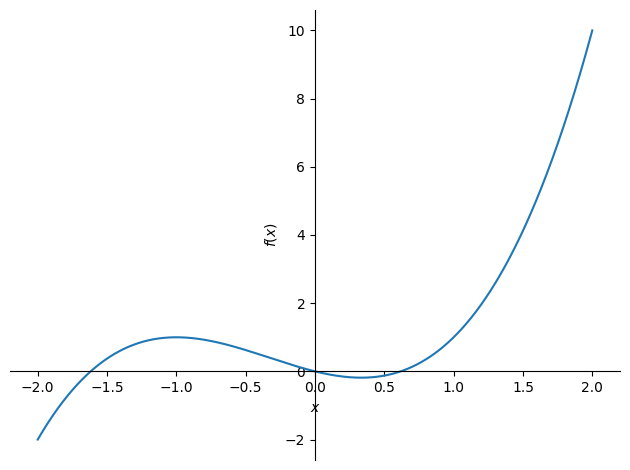

In [ ]:
x = Symbol('x')
f = x**3 + x**2 - x
plot(f, (x, -2, 2))
plt.show()

In [ ]:
f_1 = 3*x**2 + 2*x - 1
f_2 = 6*x + 2

In [ ]:
def local_extrema_calculator(f, x):
  x = Symbol('x')
  j = 0

  max_list = []
  min_list = []

  # find f'
  dy = Derivative(f, x).doit()
  print(f'Dervivative: {dy}')

  # find critical points
  critical_points = solve(dy, x)
  print(f'Critical points: {critical_points}')

  # check if max/min using second derivative test
  d2f = Derivative(f, x, 2).doit()

  # review second derivative test
  for i in critical_points:
    cp = d2f.subs({x:critical_points[j]}).evalf()
    if cp > 0:
      # local min
      print(f'x: {critical_points[j].evalf(3)} is a local minimum')
      y = f.subs({x:critical_points[j]}).evalf()
      min_list.append(float(y))
    elif cp == 0:
      print(f'unable to determine if {cp} is min or max')
    else:
      # local max
      print(f'x: {critical_points[j].evalf(3)} is a local maximum')
      y = f.subs({x:critical_points[j]}).evalf()
      max_list.append(float(y))

    j = j+1
  print(f'local mins: {min_list}')
  print(f'local maxs: {max_list}')

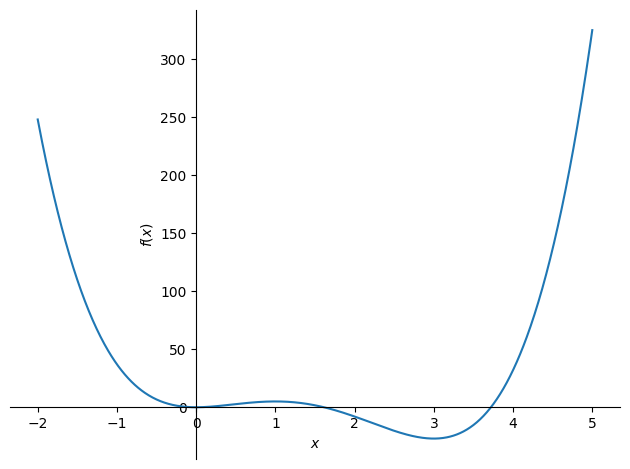

Dervivative: 12*x**3 - 48*x**2 + 36*x
Critical points: [0, 1, 3]
x: 0 is a local minimum
x: 1.00 is a local maximum
x: 3.00 is a local minimum
local mins: [0.0, -27.0]
local maxs: [5.0]


In [ ]:
f = 3*x**4 - 16*x**3 + 18*x**2
plot(f, (x, -2, 5))
plt.show()

local_extrema_calculator(f, x)

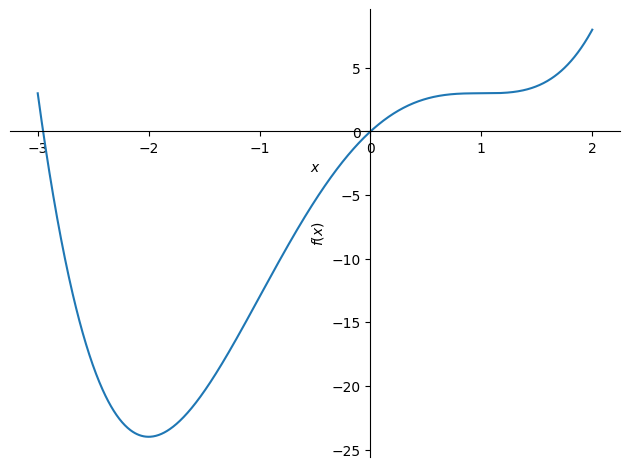

Dervivative: 4*x**3 - 12*x + 8
Critical points: [-2, 1]
x: -2.00 is a local minimum
unable to determine if 0 is min or max
local mins: [-24.0]
local maxs: []


In [ ]:
f = x**4 - 6*x**2 + 8*x
plot(f, (x, -3, 2))
plt.show()

local_extrema_calculator(f, x)

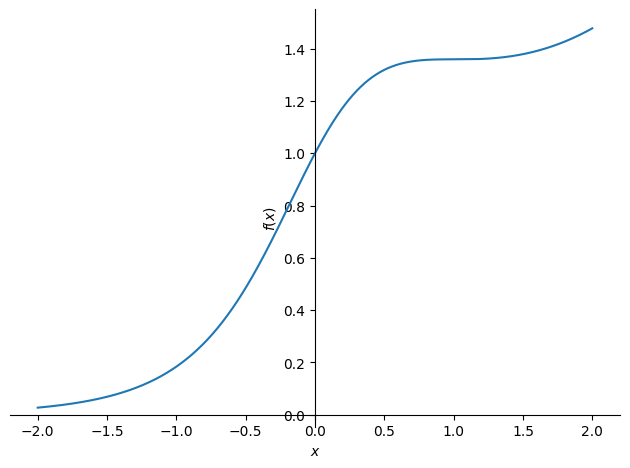

Dervivative: -2*x*exp(x)/(x**2 + 1)**2 + exp(x)/(x**2 + 1)
Critical points: [1]
unable to determine if 0 is min or max
local mins: []
local maxs: []


In [ ]:
f = exp(x) / (x**2 + 1)
plot(f, (x, -2, 2))
plt.show()

local_extrema_calculator(f, x)

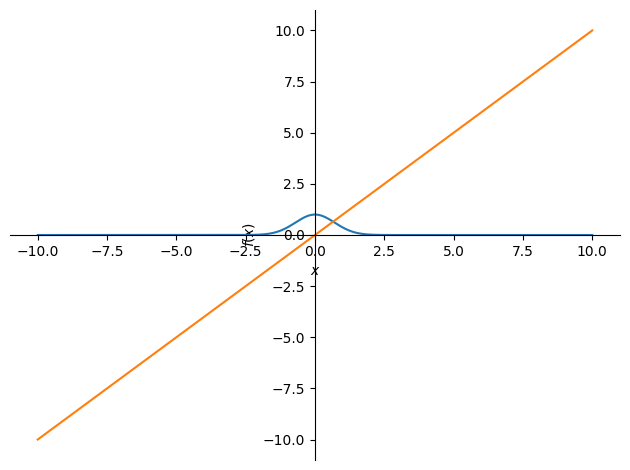

Dervivative: -2*x*exp(-x**2)
Critical points: [0]
x: 0 is a local maximum
local mins: []
local maxs: [1.0]


In [ ]:
f = exp(-x**2)
plot(f, x)
plt.show()

local_extrema_calculator(f, x)

## Finding local extrema

In [ ]:
x = symbols('x')
# Store the original function f(x)
f = x**3 + x**2 - x
# Store the derivative f'(x)
f_prime = diff(f, x)
print(f_prime)
solveset(f_prime, x)

3*x**2 + 2*x - 1


{-1, 1/3}

In [ ]:
sample = [-2, 0, 1]
sample_values = [f_prime.subs(x, i) for i in sample]
sample_values

[7, -1, 4]

## Find global extrema

In [ ]:
x = symbols('x')
f = x**3 + x**2 - x
# list possible x values of extrema
x_values = [-2, -1, 1/3, 1]
# compute function values
f_values = [f.subs(x, i) for i in x_values]
print(f_values)

[-2, 1, -0.185185185185185, 1]


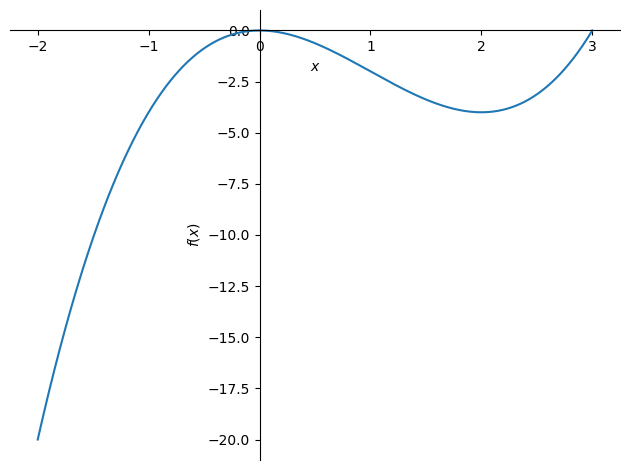

Dervivative: 3*x**2 - 6*x
Critical points: [0, 2]
x: 0 is a local maximum
x: 2.00 is a local minimum
local mins: [-4.0]
local maxs: [0.0]


In [ ]:
f = x**3 - 3*x**2
plot(f, (x, -2, 3))
local_extrema_calculator(f, x)

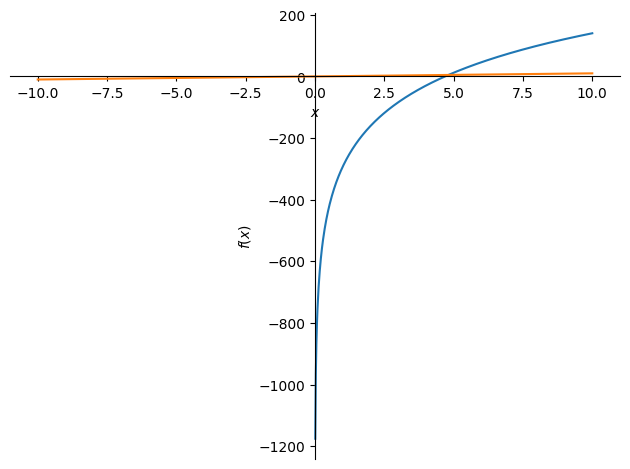

Dervivative: -1 + 192/x
Critical points: [192]
x: 192 is a local maximum
local mins: []
local maxs: [525.4351942552601]


In [ ]:
f = 192*ln(x/1041) -x + 1042
plot(f, x)
local_extrema_calculator(f, x)

In [ ]:
x = symbols('x')
# a
f = 192*ln(x/1041) -x + 1042
f_prime = diff(f, x)
print(solveset(f_prime, x))

f.subs(x, 192)

{192}


192*log(64/347) + 850

In [ ]:
192 * np.log(64/347) +850

np.float64(525.4351942552601)

# Integrals
---

In [ ]:
def left_reimman_sum(f, n):
  # define limits
  a = 0
  b = 1
  width = (b-a)/n
  heights = []
  areas = []

  for i in range(n):
    height = f.subs({x:a + width*i}).evalf()
    areas.append(width * height)
    heights.append(height)

  # sum areas
  total_area = sum(areas)
  print(f'Left Riemman sum is: {total_area}')

  # compute the actual integral
  intgrl = Integral(f, (x, a, b)).doit()
  print(f'The actual integral: {intgrl}')

In [ ]:
x = Symbol('x')
f = x**2
left_reimman_sum(f, 100)

Left Riemman sum is: 0.328350000000000
The actual integral: 1/3


In [ ]:
def right_reimman_sum(f, n):
  # define limits
  a = 2
  b = 5
  width = (b-a)/n
  heights = []
  areas = []

  for i in range(n):
    height = f.subs({x:a + width*(i+1)}).evalf()
    areas.append(width * height)
    heights.append(height)

  # sum areas
  total_area = sum(areas)
  print(f'Right Riemman sum is: {total_area}')

  # compute the actual integral
  intgrl = Integral(f, (x, a, b)).doit()
  print(f'The actual integral: {intgrl}')

In [ ]:
x = Symbol('x')
f = 4*x - 3
right_reimman_sum(f, 3)

Right Riemman sum is: 39.0000000000000
The actual integral: 33


In [ ]:
x = [ 0, 2, 5, 6, 10 ]
f = [ 1.5, 4, 7.2, 8, 9.1 ]
n = 4
left_rect = [f[i]*(x[i+1]-x[i]) for i in range(0,n)]
right_rect = [f[i+1]*(x[i+1]-x[i]) for i in range(0,n)]
LHS = sum(left_rect)
RHS = sum(right_rect)
print(f'The left-hand sum is {LHS} and the right-hand sum is {RHS}')

The left-hand sum is 54.2 and the right-hand sum is 74.0


In [ ]:
x = symbols('x')
f = x**2  + 2*x + 1
a = -1
b = 1
n = 4
dx = (b - a)/n
x_left = [a + i*dx for i in range (0, n)]
x_right = [a + i*dx for i in range(1,n+1)]
f_left = [f.subs(x,i) for i in x_left]
f_right = [f.subs(x,i) for i in x_right]
LHS = sum(f_left)*dx
RHS = sum(f_right)*dx
print(f'The left-hand sum is {LHS} and the right-hand sum is {RHS}')

The left-hand sum is 1.75000000000000 and the right-hand sum is 3.75000000000000


In [ ]:
x = symbols('x')
integrate(x*exp(x), (x, 0, 1))

1

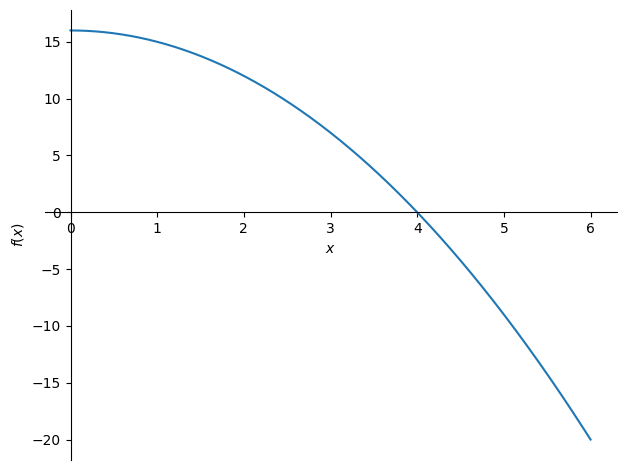

In [ ]:
f = 16 - x**2
plot(f, (x, 0, 6))
plt.show()

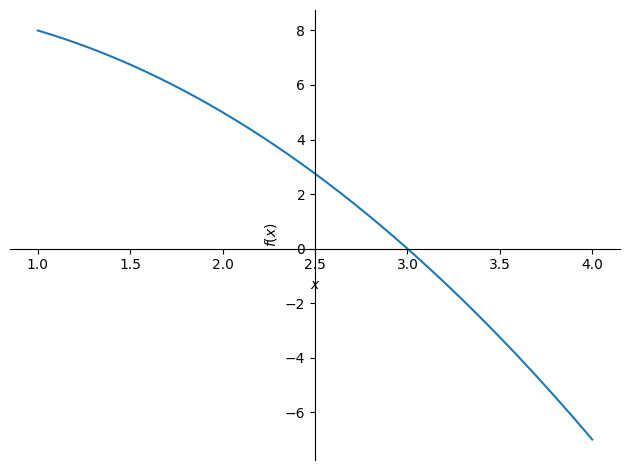

28/3
-10/3


In [ ]:
x = symbols('x')
f = 9 - x**2
plot(f, (x, 1, 4))
plt.show()

print(integrate(f, (x, 1, 3)))
print(integrate(f, (x, 3, 4)))

In [ ]:
x = symbols('x')
g = 9 - x**2
# positive area above x-axis
above_x_axis = integrate(g, (x, 1, 3))
print(above_x_axis)
# negative area below x-axis
below_x_axis = integrate(g, (x, 3, 4))
print(below_x_axis)

28/3
-10/3


In [ ]:
x = symbols('x')
f = x**(1/2) + (1/x)
intg = integrate(f, (x, 4, 9))
print(intg)
intg.evalf()

-log(4) + log(9) + 12.6666666666667


13.4775968828830

In [ ]:
x = symbols('x')
f = 3*x**2 + 2*x
f_avg = (1/5)*integrate(f, (x, 0, 5))
f_avg

30.0000000000000

In [ ]:
t = symbols('t')
P = 2560*exp(0.017*t)
f_avg = (1/49)*integrate(P, (t, 0, 49))
f_avg

3995.84046635328